In [56]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Substitua 'seu_usuario', 'sua_senha', 'seu_host' e 'seu_banco_de_dados' com suas próprias informações
usuario = ''
senha = ''
host = ''
banco_de_dados = ''

# Crie a string de conexão com suas informações
string_conexao = f'postgresql://{usuario}:{senha}@{host}/{banco_de_dados}'
# Conecta ao banco de dados
engine = create_engine(string_conexao)

In [58]:
# Consulta SQL para recuperar os dados dos resultados dos algoritmos
query2 = '''
    SELECT ra.Algoritmo, ra.TamanhoAmostra, ra.TempoMicrosegundos
    FROM ResultadosHardware rh
    JOIN ResultadosAlgoritmos ra ON rh.ID_ResultadosAlgoritmos = ra.ID
    WHERE rh.ID_InformacoesHardware = 1;
'''
df2 = pd.read_sql(query2, engine)
# Realiza a análise inicial dos dados
analise_descritiva = df2.groupby(['algoritmo', 'tamanhoamostra']).describe()
# Exibe as estatísticas descritivas
print(analise_descritiva)

                           tempomicrosegundos                            \
                                        count       mean            std   
algoritmo   tamanhoamostra                                                
Bubble Sort 100                          10.0    56804.0   13458.340000   
            1000                         10.0   302730.0   47385.793699   
            10000                        10.0  2512300.0  629959.266761   
Merge Sort  100                          10.0    51438.0    4352.207103   
            1000                         10.0   196150.0   60450.994845   
            10000                        10.0  2048100.0  764358.474656   
Quick Sort  100                          10.0    67241.0   32624.600619   
            1000                         10.0   190500.0   63916.820947   
            10000                        10.0  2296700.0  479266.117216   

                                                                        \
                         

In [59]:
# Consulta SQL para recuperar os dados dos resultados dos algoritmos
query2 = '''
    SELECT ra.Algoritmo, ra.TamanhoAmostra, ra.TempoMicrosegundos
    FROM ResultadosHardware rh
    JOIN ResultadosAlgoritmos ra ON rh.ID_ResultadosAlgoritmos = ra.ID
    WHERE rh.ID_InformacoesHardware = 2;
'''
df2 = pd.read_sql(query2, engine)
# Realiza a análise inicial dos dados
analise_descritiva = df2.groupby(['algoritmo', 'tamanhoamostra']).describe()
# Exibe as estatísticas descritivas
print(analise_descritiva)

                           tempomicrosegundos                           \
                                        count       mean           std   
algoritmo   tamanhoamostra                                               
Bubble Sort 100                          10.0  3348300.0  2.554654e+06   
            1000                         10.0  3492700.0  2.500452e+06   
            10000                        10.0  3954400.0  2.639059e+06   
Merge Sort  100                          10.0  3384400.0  2.267795e+06   
            1000                         10.0  3406400.0  2.472162e+06   
            10000                        10.0  3767000.0  2.652014e+06   
Quick Sort  100                          10.0  3357506.0  2.801038e+06   
            1000                         10.0  3412000.0  2.549821e+06   
            10000                        10.0  3590400.0  2.500776e+06   

                                                                       \
                                 min  

In [60]:
# Consulta SQL para recuperar os dados dos resultados dos algoritmos
query2 = '''
    SELECT ra.Algoritmo, ra.TamanhoAmostra, ra.TempoMicrosegundos
    FROM ResultadosHardware rh
    JOIN ResultadosAlgoritmos ra ON rh.ID_ResultadosAlgoritmos = ra.ID
    WHERE rh.ID_InformacoesHardware = 3;
'''
df2 = pd.read_sql(query2, engine)
# Realiza a análise inicial dos dados
analise_descritiva = df2.groupby(['algoritmo', 'tamanhoamostra']).describe()
# Exibe as estatísticas descritivas
print(analise_descritiva)

                           tempomicrosegundos                            \
                                        count       mean            std   
algoritmo   tamanhoamostra                                                
Bubble Sort 100                          10.0    23514.9   15194.174764   
            1000                         10.0   163688.0   69412.663558   
            10000                        10.0  1356380.0  415288.940378   
Merge Sort  100                          10.0    44641.0   60357.968718   
            1000                         10.0   142397.0   59758.461242   
            10000                        10.0  1213300.0  388545.790237   
Quick Sort  100                          10.0    21283.1   21413.078467   
            1000                         10.0   168453.0   55316.249180   
            10000                        10.0  1185720.0  366315.910414   

                                                                       \
                          

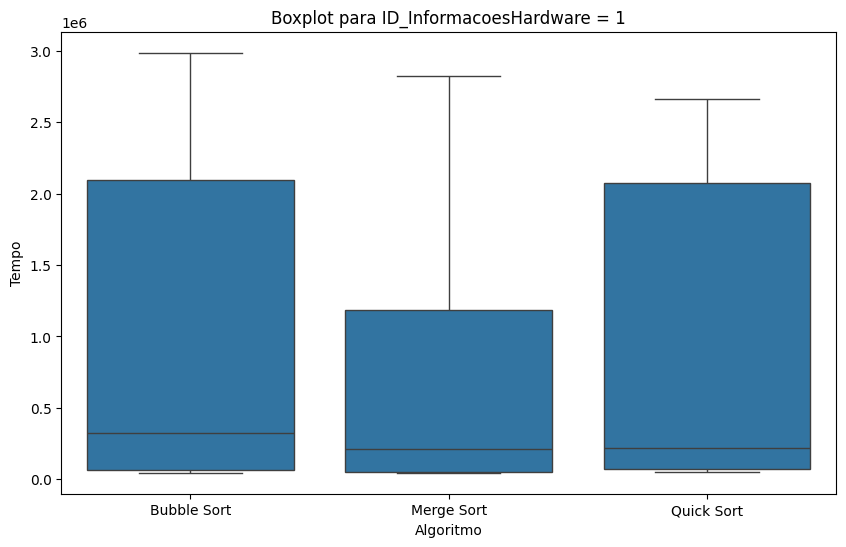

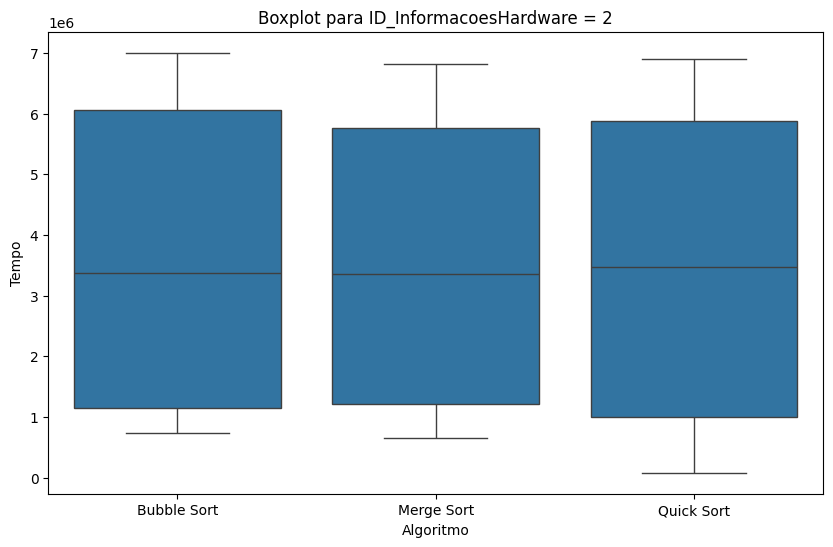

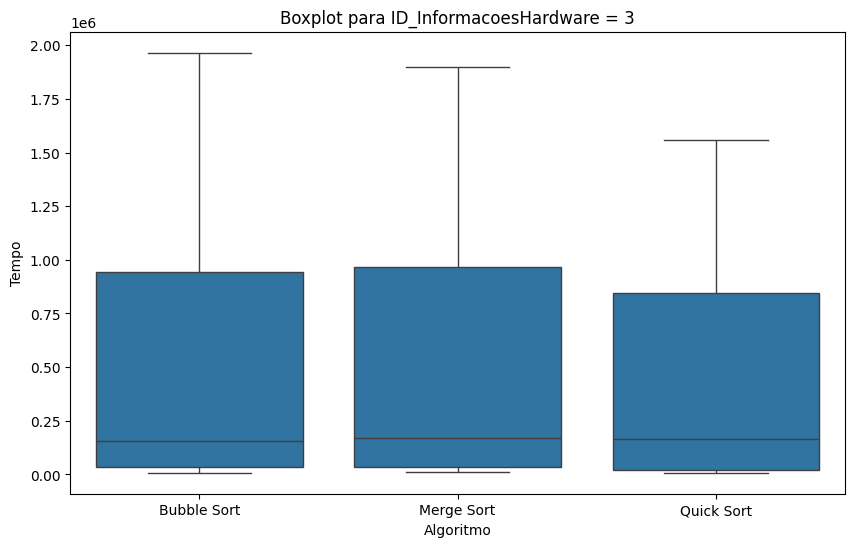

In [76]:
# Lista de algoritmos a serem comparados
algoritmos_interesse = ['Bubble Sort', 'Merge Sort', 'Quick Sort']

# Loop sobre os diferentes ID_InformacoesHardware
for hardware_id in [1, 2, 3]:
    # Consulta SQL para recuperar os dados dos resultados dos algoritmos de interesse
    query = f'''
        SELECT ra.Algoritmo, ra.TempoMicrosegundos
        FROM ResultadosHardware rh
        JOIN ResultadosAlgoritmos ra ON rh.ID_ResultadosAlgoritmos = ra.ID
        WHERE rh.ID_InformacoesHardware = {hardware_id}
        AND ra.Algoritmo IN {tuple(algoritmos_interesse)};
    '''
    
    df = pd.read_sql(query, engine)

    # Verificar se há dados retornados pela consulta
    if not df.empty:
        # Criar um boxplot para os tempos dos algoritmos de interesse
        plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
        sns.boxplot(x='algoritmo', y='tempomicrosegundos', data=df)
        plt.xlabel('Algoritmo')
        plt.ylabel('Tempo')
        plt.title(f'Boxplot para ID_InformacoesHardware = {hardware_id}')
        plt.show()
    else:
        print(f"Nenhum dado retornado para ID_InformacoesHardware = {hardware_id}")

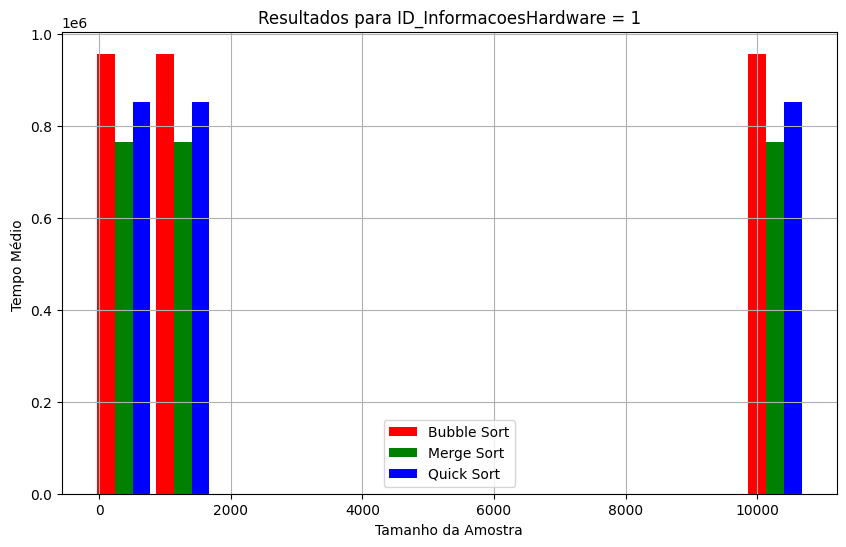

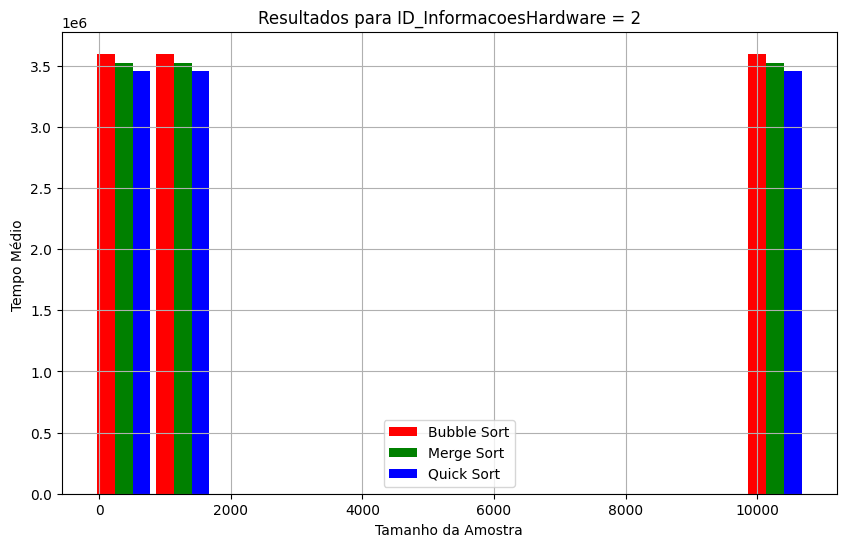

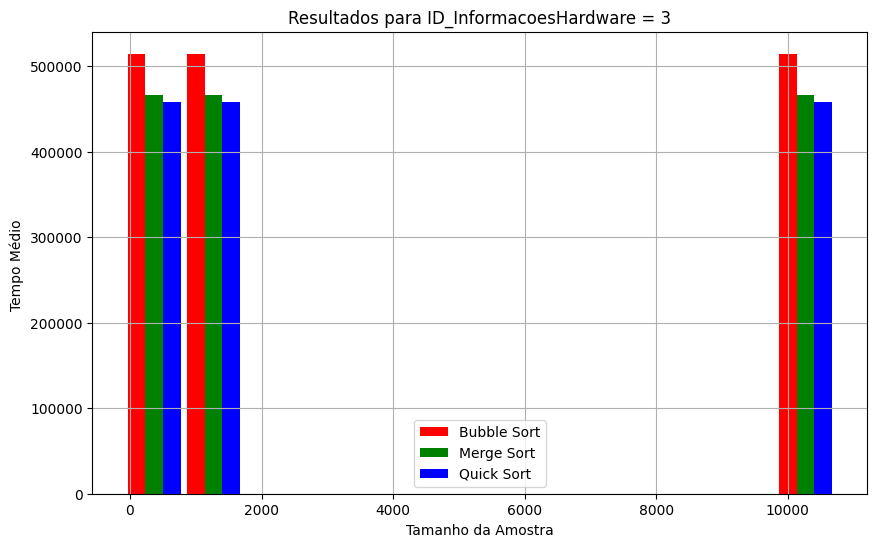

In [77]:
# Lista de algoritmos a serem comparados
algoritmos_interesse = ['Bubble Sort', 'Merge Sort', 'Quick Sort']


# Loop sobre os diferentes ID_InformacoesHardware
for hardware_id in [1, 2, 3]:
    # Consulta SQL para recuperar os dados dos resultados dos algoritmos de interesse
    query = f'''
        SELECT ra.Algoritmo, ra.TamanhoAmostra, ra.TempoMicrosegundos
        FROM ResultadosHardware rh
        JOIN ResultadosAlgoritmos ra ON rh.ID_ResultadosAlgoritmos = ra.ID
        WHERE rh.ID_InformacoesHardware = {hardware_id}
        AND ra.Algoritmo IN {tuple(algoritmos_interesse)};
    '''
    
    df = pd.read_sql(query, engine)

    # Verificar se há dados retornados pela consulta
    if not df.empty:
        # Plotar gráfico de barras para as médias dos tempos dos algoritmos de interesse
        plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
        cores = ['r', 'g', 'b']  # Cores para Bubble, Merge e Quick, respectivamente
        largura_barra = 270
         # Largura da barra no gráfico

        for i, algoritmo in enumerate(algoritmos_interesse):
            dados_algoritmo = df[df['algoritmo'] == algoritmo]
            posicoes = dados_algoritmo['tamanhoamostra'] + i * largura_barra
            plt.bar(
                posicoes,
                dados_algoritmo['tempomicrosegundos'].mean(),
                width=largura_barra,
                label=algoritmo,
                color=cores[i]
            )

        plt.xlabel('Tamanho da Amostra')
        plt.ylabel('Tempo Médio ')
        plt.title(f'Resultados para ID_InformacoesHardware = {hardware_id}')
        plt.legend()
        plt.grid(True)  # Adicionando linhas de grade para melhor visualização
        plt.show()
    else:
        print(f"Nenhum dado retornado para ID_InformacoesHardware = {hardware_id}")

